<a href="https://colab.research.google.com/github/OliveiraGmo/Chalenge_TeleconX_alura/blob/main/Gabriel_Monteiro_Challenge_TeleconX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"O foco é procurar encontrar relações e tendências entre as variáveis, bem como explorar a distribuição dos dados para tentar, visualmente, encontrar perfis de clientes que optaram sair do plano."

> Desafios





1.   Analisar a variável target: Churn
2.   Analisar a distribuição da variável target: Churn
3.   Criar visualizações relevantes em relação ao Churn\n",
4.   Analisar a correlação entre as variáveis\n",
5.   Testar diferentes tipos de gráfico"
   
  


#📌 Extracão

      

##Carregando a base de dados

In [16]:
#Importando o arquivo json, via api fornecida do challenge
import requests
import json

api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
response = requests.get(api_url)
data = response.json()

In [17]:
# Importando o pandas
import pandas as pd

In [18]:
# Transformando os dados em um Dataframe no pandas
dados = pd.json_normalize(data)
#Exibindo as primeiras linhas
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Aqui inicio a exploração dos tipos de dados a serem vizualizados.

In [19]:
# Visualizando informações básicas
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [20]:
dados.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [21]:
dados.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [22]:
# Verificando se há dados nulos

dados.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


#🔧 Transformação

Será renomado as colunas para português, para facilitar o entendimento do código.

In [24]:
# Renomear colunas para português
dados.rename(columns={
    'customerID' : 'idcliente',
    'Churn':'evazao',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'idoso',
    'customer.Partner':'parceiro',
    'customer.Dependents': 'dependentes',
    'customer.tenure': 'meses_contrato',
    'phone.PhoneService': 'servico_telefone',
    'phone.MultipleLines': 'multiplas_linhas',
    'internet.InternetService':'servico_de_internet',
    'internet.OnlineSecurity':'antivirus',
    'internet.OnlineBackup':'backup',
    'internet.DeviceProtection':'protecao__de_dipositivo',
    'internet.TechSupport':'suporte_tecnico',
    'internet.StreamingTV':'streaming_tv',
    'internet.StreamingMovies':'streaming_filmes',
    'account.Contract':'tipo_contrato',
    'account.PaperlessBilling':'fatura_digital',
    'account.PaymentMethod':'metodo_pagamento',
    'account.Charges.Monthly':'total_mensal',
    'account.Charges.Total':'gasto_total'
}, inplace=True)
dados.head()


,idcliente,evazao,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_de_internet,...,backup,protecao__de_dipositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,total_mensal,gasto_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


####Para facilitar análises futuras, substituindo Yes e No por 0 e 1

In [92]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
for col in dados.columns:
  dados[col] = dados[col].replace({'Yes': 1, 'No': 0, 'No phone service': 0}).infer_objects(copy=False)

dados.head()

,idcliente,evazao,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_de_internet,...,protecao__de_dipositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,total_mensal,gasto_total,meses_contrato_trimestre
0,0002-ORFBO,0,Mulher,0,1,1,9,1,0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,4º Trimestre
1,0003-MKNFE,0,Homem,0,0,0,9,1,1,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,4º Trimestre
2,0004-TLHLJ,1,Homem,0,0,0,4,1,0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2º Trimestre
3,0011-IGKFF,1,Homem,1,1,0,13,1,0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,5º Trimestre
4,0013-EXCHZ,1,Mulher,1,1,0,3,1,0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2º Trimestre


In [26]:
#Explorando inconsistencias das colunas
for col in dados:
    print(col, dados[col].unique())

idcliente ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
evazao [0 1 '']
genero ['Female' 'Male']
idoso [0 1]
parceiro [1 0]
dependentes [1 0]
meses_contrato [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
servico_telefone [1 0]
multiplas_linhas [0 1]
servico_de_internet ['DSL' 'Fiber optic' 0]
antivirus [0 1 'No internet service']
backup [1 0 'No internet service']
protecao__de_dipositivo [0 1 'No internet service']
suporte_tecnico [1 0 'No internet service']
streaming_tv [1 0 'No internet service']
streaming_filmes [0 1 'No internet service']
tipo_contrato ['One year' 'Month-to-month' 'Two year']
fatura_digital [1 0]
metodo_pagamento ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
total_mensal [65.6  59.9  73.9  ... 91.75 68.8  67.

In [87]:
# Conferindo a coluna evazao
dados['evazao'].unique()

array([0, 1])

In [88]:
#Tratando inconsistencia, primeiro atribuindo cono not a number a inconsistencia
import numpy as np
dados['evazao'] = dados['evazao'].replace('', np.nan)

In [89]:
# Conferindo
dados['evazao'].unique()

array([0, 1])

In [90]:
# Eliminando as linhas com valores não numéricos

dados.dropna(subset=['evazao'], inplace=True)
dados['evazao'] = dados['evazao'].astype(int)
dados['evazao'].reset_index()
print(dados['evazao'].unique())

[0 1]


In [91]:
#Tratando gasto total pois consta como object
dados['gasto_total'] = dados['gasto_total'].replace(' ', np.nan) # transformando string vazia em nan
dados.dropna(subset=['gasto_total'], inplace=True) # eliminando não numéricos
dados['gasto_total'] = dados['gasto_total'].astype(float) # Certificando que a coluna tenha somente float
dados['gasto_total'].reset_index() # Resetando o indice

,index,gasto_total
0,0,593.30
1,1,542.40
2,2,280.85
3,3,1237.85
4,4,267.40
...,...,...
7027,7262,742.90
7028,7263,1873.70
7029,7264,92.75
7030,7265,4627.65


In [32]:
#Contando os valores
dados['evazao'].value_counts()

,count
evazao,
0,5163
1,1869


In [33]:
# Traduzindo o genero para facilitar o entendimento
dados['genero'] = dados['genero'].replace({'Female': 'Mulher', 'Male': 'Homem'})

####Se o cliente não tem internet, ele não pode ter serviços relacionados a internet, como internet movel, backup online e outros serviços da categoria

In [34]:
dados['servico_de_internet'].unique()

array(['DSL', 'Fiber optic', 0], dtype=object)

In [35]:
# conferindo quantos não possuim internet
len(dados[dados['servico_de_internet']==0])

1520

In [36]:
#Filtrando dados em duas partes, as colunas com os tipos de serviços e dos usuarios que não tem internt
servicos_de_internet = ['antivirus', 'backup', 'protecao__de_dipositivo',
       'suporte_tecnico', 'streaming_tv', 'streaming_filmes']
no_internet = dados[dados['servico_de_internet'] == 0]


In [37]:
dados['gasto_total'] = pd.to_numeric(dados['gasto_total'], errors='coerce')
dados.dropna(subset=['gasto_total'], inplace=True)

####Com o código abaixo , é possivel conferir se ha inconsisitencias ,verificando se um usuário sem internet , possui algum serviço  agregado de internet.

In [38]:
# Conferindo insconsistencia :
for item in servicos_de_internet:
  yes_count = (no_internet[item] == '1').sum()
  print( f" Na coluna {item} foram encontradas {yes_count} inconsistencias" )

 Na coluna antivirus foram encontradas 0 inconsistencias
 Na coluna backup foram encontradas 0 inconsistencias
 Na coluna protecao__de_dipositivo foram encontradas 0 inconsistencias
 Na coluna suporte_tecnico foram encontradas 0 inconsistencias
 Na coluna streaming_tv foram encontradas 0 inconsistencias
 Na coluna streaming_filmes foram encontradas 0 inconsistencias


####Aqui vou fazer o mesmo para as linhas telefonicas para conferir se há inconsistencias


In [39]:
df_no_tel = dados[dados['servico_telefone']==0]

yes_count_multiplas_linhas = (df_no_tel['multiplas_linhas'] == 1).sum()

print( f" Na coluna multiplas_linhas, para clientes sem serviço de telefone, foram encontradas {yes_count_multiplas_linhas} inconsistencias (clientes com multiplas linhas ativas sem serviço de telefone)" )

 Na coluna multiplas_linhas, para clientes sem serviço de telefone, foram encontradas 0 inconsistencias (clientes com multiplas linhas ativas sem serviço de telefone)


In [40]:
for i in ['multiplas_linhas']:
  yes_count = (df_no_tel[i] == 1).sum()
  print( f" Na coluna {i} foram encontradas {yes_count} inconsistencias" )

 Na coluna multiplas_linhas foram encontradas 0 inconsistencias


#📊 Carga e análise

* Visualizando a evazão em geral

In [41]:
# Analizando a coluna evazão
evazao_counts = dados['evazao'].value_counts()

# Calculate the percentage of each unique value
evazao_percentages = (evazao_counts / len(dados)) * 100

print("Distribuição percentual da Evasão:")
print(evazao_percentages)

Distribuição percentual da Evasão:
evazao
0    73.421502
1    26.578498
Name: count, dtype: float64


In [42]:
dados['evazao'].describe()

,evazao
count,7032.000000
mean,0.265785
std,0.441782
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Análise por Variáveis Categóricas

####Agora, vamos explorar como a evasão se distribui de acordo com variáveis categóricas, como gênero, tipo de contrato, método de pagamento, entre outras.Essa análise pode revelar padrões interessantes, como, por exemplo, se clientes de determinados perfis têm maior tendência a cancelar o serviço, o que ajudará a direcionar ações estratégicas.

#### Evasão por Gênero, Parceiro, Idoso e Dependentes

* Evazão por genero

In [44]:

dados[dados['evazao']==1].groupby('genero').size()

,0
genero,
Homem,930
Mulher,939


*  Conferindo se ter parceiro apresenta influência

In [45]:
dados[(dados['evazao'] == 1) & (dados['parceiro'] == 1)].groupby('dependentes').size()

,0
dependentes,
0,420
1,249


* Podemos ver que ter dependentes e parceiro não apresenta forte relação com e evazão

In [46]:
dados[(dados['dependentes']==0) & (dados['parceiro']==0)].groupby(dados['evazao']).size()


,0
evazao,
0,2157
1,1123


* Evazão entre os idosos

In [47]:
dados[(dados['evazao']==1) & (dados['idoso']==1)].groupby('genero').size()

,0
genero,
Homem,236
Mulher,240


* Conferindo se ter dependentes apresenta influência.

In [48]:
dados[(dados['dependentes']==1) & (dados['parceiro']==1)].groupby(dados['evazao']).size()

,0
evazao,
0,1491
1,249


#### Evasão por Tipo de Contrato

* Evazão por tipo de contrato, podemos ver que o que é mensal tem um alto indice

In [49]:
evazao_por_contrato = dados[dados['evazao']==1].groupby('tipo_contrato').size()


total_churned = len(dados[dados['evazao']==1])


evazao_por_contrato_percentagem = (evazao_por_contrato / total_churned) * 100

print("Evasão por Tipo de Contrato (Percentagem dos Clientes Evadidos):")
print(evazao_por_contrato_percentagem)

Evasão por Tipo de Contrato (Percentagem dos Clientes Evadidos):
tipo_contrato
Month-to-month    88.550027
One year           8.881755
Two year           2.568218
dtype: float64


#### Evasão por Método de Pagamento

* Evazão por metodo de pagamento, podemos ver que o check eletronico tem um alto valor.

In [50]:
evazao_metodo_pagamento = dados[(dados['evazao']==1)].groupby('metodo_pagamento').size()

total_churned = len(dados[dados['evazao']==1])

evazao_metodo_pagamento_percentagem = (evazao_metodo_pagamento / total_churned) * 100
print("Evasão por Método de Pagamento :")
print(evazao_metodo_pagamento_percentagem)
#

Evasão por Método de Pagamento :
metodo_pagamento
Bank transfer (automatic)    13.804173
Credit card (automatic)      12.413055
Electronic check             57.303371
Mailed check                 16.479401
dtype: float64


#### Evasão por Serviços de Internet

* Podemos ver um alto indice de evasão no serviço de fibra optica

In [51]:
evazao_servico_internet = dados[(dados['evazao']==1)].groupby('servico_de_internet').size()

total_churned = len(dados[dados['evazao']==1])

evazao_servico_internet_percentagem = (evazao_servico_internet / total_churned) * 100
print("Evasão por Serviços de Internet :")
print(evazao_servico_internet_percentagem)

Evasão por Serviços de Internet :
servico_de_internet
0               6.046014
DSL            24.558587
Fiber optic    69.395399
dtype: float64


* Explorando algumas correlações

In [52]:
# Selecionando as colunas de interesse
colunas_interesse = ['dependentes', 'parceiro', 'evazao','idoso','servico_telefone']

# Calculando a matriz de correlação
matriz_correlacao = dados[colunas_interesse].corr()

# Exibindo a correlação entre dependentes, parceiro,idoso,serviçode telefone e evasão
print("Matriz de Correlação:")
print(matriz_correlacao)


Matriz de Correlação:
                  dependentes  parceiro    evazao     idoso  servico_telefone
dependentes          1.000000  0.452269 -0.163128 -0.210550         -0.001078
parceiro             0.452269  1.000000 -0.149982  0.016957          0.018397
evazao              -0.163128 -0.149982  1.000000  0.150541          0.011691
idoso               -0.210550  0.016957  0.150541  1.000000          0.008392
servico_telefone    -0.001078  0.018397  0.011691  0.008392          1.000000


In [53]:
# A correlação entre dependentes e evasão
correlacao_dependentes_evazao = matriz_correlacao.loc['dependentes', 'evazao']
print(f"\nCorrelação entre Dependentes e Evasão: {correlacao_dependentes_evazao}")

# A correlação entre parceiro e evasão
correlacao_parceiro_evazao = matriz_correlacao.loc['parceiro', 'evazao']
print(f"Correlação entre Parceiro e Evasão: {correlacao_parceiro_evazao}")
# A correlação entre idosos e evazao
correlação_idoso_evazao = matriz_correlacao.loc['idoso', 'evazao']
print(f"Correlação entre Idoso e Evasão: {correlação_idoso_evazao}")
# A correlação entre idosos e evazao
correlação_servico_telefone_evazao = matriz_correlacao.loc['servico_telefone', 'evazao']
print(f"Correlação entre Serviço de Telefone e Evasão: {correlação_servico_telefone_evazao}")



Correlação entre Dependentes e Evasão: -0.16312843938821994
Correlação entre Parceiro e Evasão: -0.14998192562005896
Correlação entre Idoso e Evasão: 0.15054105341568091
Correlação entre Serviço de Telefone e Evasão: 0.01169139886542153


* Observando visualmente as correlações

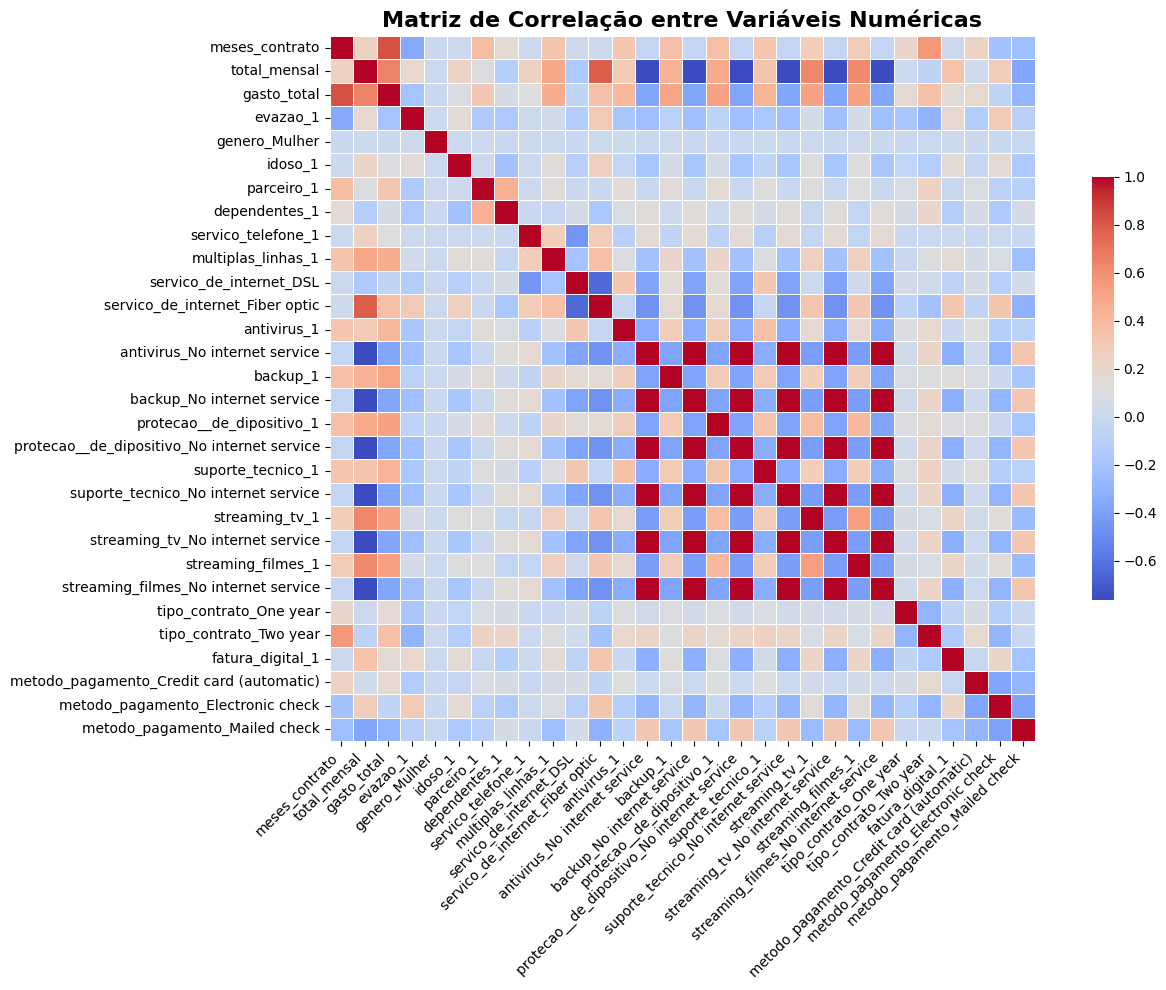

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

var_corr = ['evazao', 'genero', 'idoso', 'parceiro', 'dependentes',
        'servico_telefone', 'multiplas_linhas',
       'servico_de_internet', 'antivirus', 'backup', 'protecao__de_dipositivo',
       'suporte_tecnico', 'streaming_tv', 'streaming_filmes', 'tipo_contrato',
       'fatura_digital', 'metodo_pagamento'] # Excluded 'gasto_total' and 'total_mensal' as they are already numerical

df = pd.get_dummies(dados, columns=var_corr, drop_first=True)

# Convert boolean columns to int (0 or 1)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

df_corr = df.corr(numeric_only=True)

plt.figure(figsize=(14, 10))

sns.heatmap(df_corr, cmap='coolwarm', annot=False, fmt='.2f', square=True, # Changed annot to False for better readability with many columns
            linewidths=.5, cbar_kws={"shrink": .6})

plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Evasao X Variáveis númericas

* Meses de contrato, pode se ver que nos 4 primeiros trimestres são os de maior evazão




In [85]:
# Define bins por intervalos de 3 meses
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, float('inf')]

# Define labels por trimestres
labels = [f'{i+1}º Trimestre' for i in range(len(bins)-1)]

# Criada nova coluna 'meses_contrato_trimestre' baseado nos trimestres
dados['meses_contrato_trimestre'] = pd.cut(dados['meses_contrato'], bins=bins, labels=labels, right=False)

# Agrupando por trimestres e coluna evazão
evazao_por_trimestre = dados[dados['evazao']==1].groupby('meses_contrato_trimestre', observed=False).size()


print("Evasão por Trimestre de Meses de Contrato:")
print(evazao_por_trimestre)

Evasão por Trimestre de Meses de Contrato:
meses_contrato_trimestre
1º Trimestre     503
2º Trimestre     241
3º Trimestre     133
4º Trimestre     122
5º Trimestre     100
6º Trimestre      91
7º Trimestre      61
8º Trimestre      57
9º Trimestre      61
10º Trimestre     40
11º Trimestre     51
12º Trimestre     41
13º Trimestre     38
14º Trimestre     41
15º Trimestre     35
16º Trimestre     32
17º Trimestre     34
18º Trimestre     30
19º Trimestre     32
20º Trimestre     27
21º Trimestre     19
22º Trimestre     17
23º Trimestre     32
24º Trimestre     25
25º Trimestre      6
dtype: int64


* Vemos que contas mensais com valores entre 60 e 105, tem um alto indice de evazão

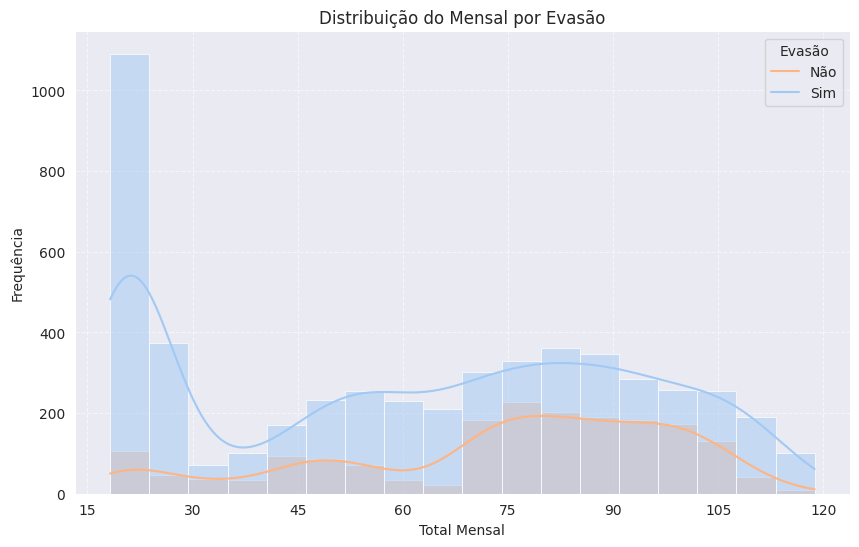

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

sns.set_style('darkgrid')

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=dados, x='total_mensal',hue='evazao', kde=True, palette="pastel", edgecolor="white", linewidth=0.5)
ax.set_title('Distribuição do Mensal por Evasão')
ax.set_xlabel('Total Mensal')
ax.set_ylabel('Frequência')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=8))
ax.grid(True, linestyle='--', alpha=0.6)
legend_labels = ['Não', 'Sim']
ax.legend( legend_labels, title='Evasão')
plt.show()

In [67]:
dados.groupby('evazao')['gasto_total'].describe()

,count,mean,std,min,25%,50%,75%,max
evazao,,,,,,,,
0,5163.0,2555.344141,2329.456984,18.80,577.825,1683.60,4264.125,8672.45
1,1869.0,1531.796094,1890.822994,18.85,134.500,703.55,2331.300,8684.80


* Como já vimos acima que a maior parte da evazão ocorre nos primeiros meses, aqui vemos que pelo gasto total confirma essa afirmação.

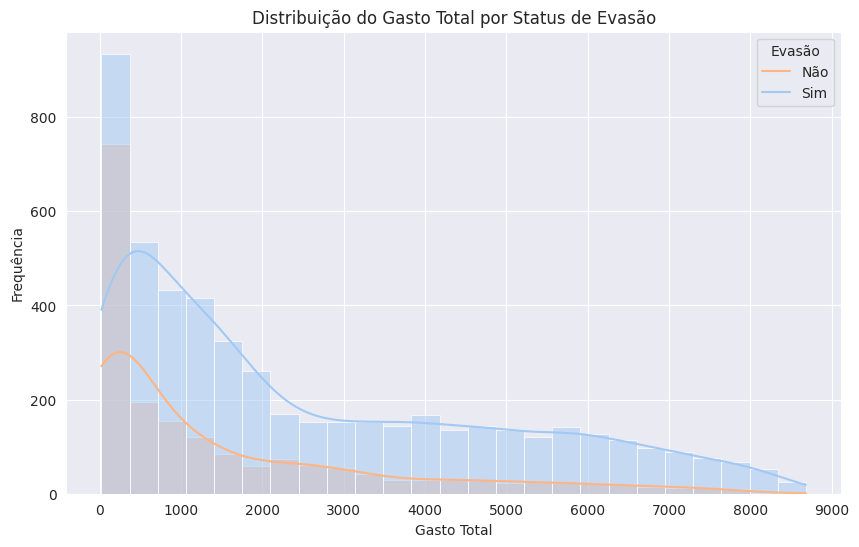

In [73]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=dados, x='gasto_total',hue='evazao', kde=True, palette="pastel",edgecolor="white", linewidth=0.5)
plt.title('Distribuição do Gasto Total por Status de Evasão')
plt.xlabel('Gasto Total')
plt.ylabel('Frequência')

# Aumentando a quantidade de ticks no eixo X
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))


legend_labels = ['Não', 'Sim']
ax.legend( legend_labels, title='Evasão')


plt.show()

* Total mensal x Evazão, pode se ver que o gasto mais alto influencia na evazão

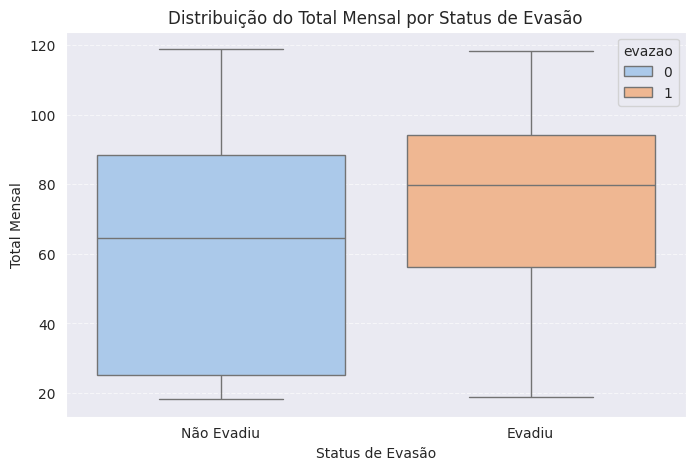

In [79]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=dados, x='evazao', y='total_mensal', hue='evazao',palette="pastel")
plt.title('Distribuição do Total Mensal por Status de Evasão')
plt.xlabel('Status de Evasão')
plt.ylabel('Total Mensal')
plt.xticks([0, 1], ['Não Evadiu', 'Evadiu'])
plt.grid(True, linestyle='--', alpha=0.6, axis='y')
plt.show()

## Serviços de internet x Evazão

* A seguir podemos ver claramente que serviço de Back up, proteçao de dispositivo, streaming de tv e filmes, tem alta correlação com Evazão

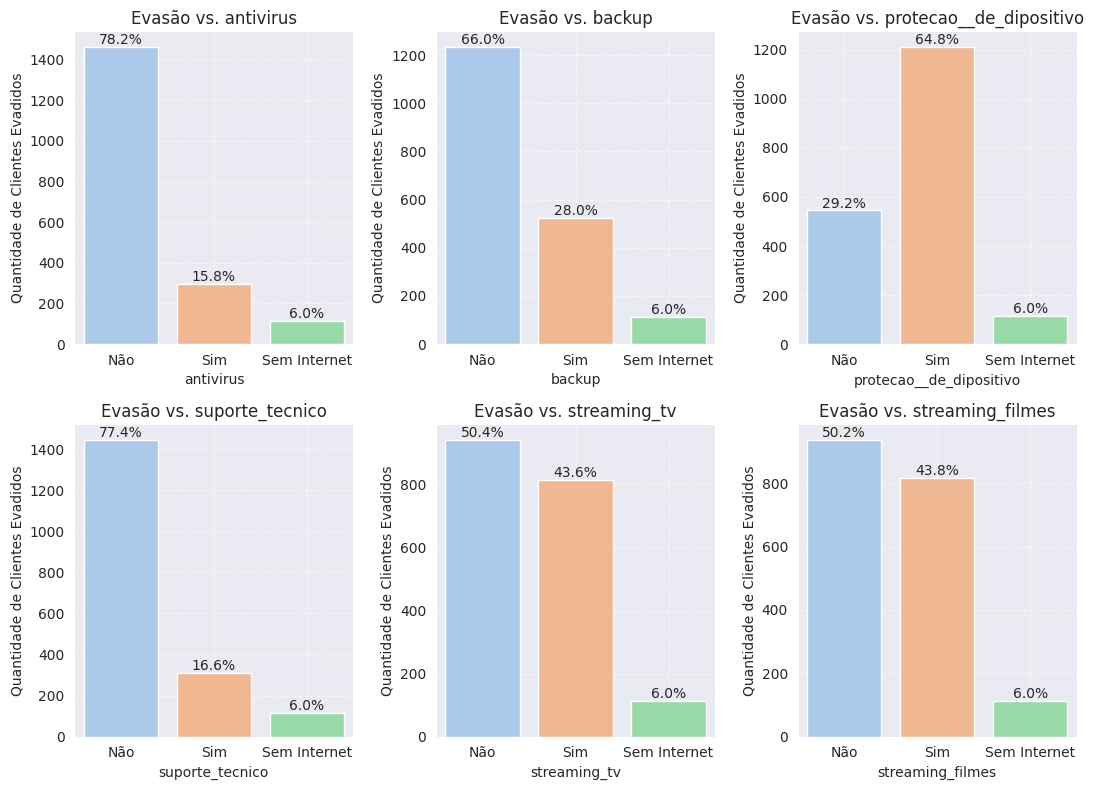

In [81]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(11, 8))
colunas = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]

servicos_de_internet = ['antivirus', 'backup', 'protecao__de_dipositivo',
       'suporte_tecnico', 'streaming_tv', 'streaming_filmes']

# Filtrando os clientes
churned_data = dados[dados['evazao'] == 1]

total_churned = len(churned_data) # Calculando o total de clientes evadidos

# zip para iterar por ambas as listas em paralelo
for idx, (i, col_pos) in enumerate(zip(servicos_de_internet, colunas)):
    # Acessar o subplot correto usando as posições da lista col_pos
    ax = axs[col_pos[0], col_pos[1]]
    # Plot using the filtered data
    sns.countplot(data=churned_data, x=i, hue=i, palette="pastel", ax=ax, legend=False)

    ax.set_title(f'Evasão vs. {i}') # Adicionar título
    ax.set_xlabel(i) # Adicionar rótulo do eixo X
    ax.set_ylabel('Quantidade de Clientes Evadidos') # Adicionar rótulo do eixo Y para refletir o filtro
    ax.spines['right'].set_visible(False) # Remover spines
    ax.spines['top'].set_visible(False)

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            percentage = (height / total_churned) * 100 # Calculate percentage of churned total
            ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')


    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['Não', 'Sim', 'Sem Internet'])




    ax.grid(True, linestyle='--', alpha=0.6) # Adiciona uma grade


plt.tight_layout()
plt.show()

In [82]:

internet_service_cols = ['antivirus', 'backup', 'protecao__de_dipositivo',
                         'suporte_tecnico', 'streaming_tv', 'streaming_filmes']

for col in internet_service_cols:

    dados[col] = pd.to_numeric(dados[col], errors='coerce')

dados_with_internet = dados[dados['servico_de_internet'] != 0].copy()

correlacao_servicos_internet_gasto_mensal = dados_with_internet[internet_service_cols + ['gasto_total', 'evazao']].corr()

print("Correlação entre Serviços de Internet, Gasto Total e Evasão (Clientes com Serviço de Internet):")
print(correlacao_servicos_internet_gasto_mensal)

Correlação entre Serviços de Internet, Gasto Total e Evasão (Clientes com Serviço de Internet):
                         antivirus    backup  protecao__de_dipositivo  \
antivirus                 1.000000  0.179488                 0.170099   
backup                    0.179488  1.000000                 0.185021   
protecao__de_dipositivo   0.170099  0.185021                 1.000000   
suporte_tecnico           0.273270  0.190381                 0.235564   
streaming_tv              0.043613  0.146821                 0.275900   
streaming_filmes          0.056238  0.137064                 0.289547   
gasto_total               0.331783  0.431750                 0.446978   
evazao                   -0.280508 -0.195758                -0.176806   

                         suporte_tecnico  streaming_tv  streaming_filmes  \
antivirus                       0.273270      0.043613          0.056238   
backup                          0.190381      0.146821          0.137064   
protecao__de_dipos

Conclusões:
* Dos tipos de contrato o que apresenta a maior evazão é o mensal.
* Dos Meios de pagamento o que lidera é o cheque eletronico.
* Do tipo de internet o de fibra otica é o que mais apresenta evazão.
* Do tempo de contrato, pode se ver que nos 5 primeiros trimestres são os de maior evazão, com os 2 primeiros liderando fortemente.
* Total mensal x Evazão, pode se ver que o gasto mais alto influencia na evazão, contas mensais com valores entre 60 e 105, tem um alto indice de evazão
* Pelo Gráfico podemos ver claramente que serviço de Back up, proteçao de dispositivo, streaming de tv e filmes, tem alta correlação com Evazão. E por análise da matriz de correlação confirmamos esta informação.


#📄Relatorio Final



## Introdução

Este relatório apresenta uma análise exploratória dos dados de clientes da TelecomX com o objetivo de identificar os principais fatores que contribuem para a evasão de clientes (Churn). Compreender o comportamento dos clientes que cancelam o serviço é crucial para desenvolver estratégias eficazes de retenção.

## Limpeza e Tratamento de Dados

Os dados foram carregados a partir de um arquivo JSON. Durante a fase de limpeza e tratamento, as seguintes etapas foram realizadas:

*   As colunas foram renomeadas para português para facilitar a compreensão (`idcliente`, `evazao`, `genero`, etc.).
*   Os valores 'Yes' e 'No' em várias colunas foram substituídos por 1 e 0, respectivamente, para permitir análises numéricas.
*   Inconsistências na coluna 'evazao', representadas por strings vazias, foram tratadas substituindo-as por valores nulos (`np.nan`) e, em seguida, as linhas com esses valores nulos foram removidas. A coluna 'evazao' foi convertida para o tipo inteiro.
*   A coluna 'gasto_total', que estava como tipo 'object' e continha espaços em branco, foi tratada substituindo os espaços por valores nulos (`np.nan`), removendo as linhas com nulos e convertendo a coluna para o tipo float.
*   Verificações foram realizadas para garantir a consistência dos dados relacionados a serviços de internet e telefone para clientes que não possuem esses serviços.
*   O gênero foi traduzido para 'Mulher' e 'Homem'.

## Análise Exploratória de Dados

A análise exploratória dos dados revelou vários padrões e insights importantes em relação à evasão de clientes:

*   **Distribuição Geral da Evasão:** Aproximadamente 26.6% dos clientes na base de dados analisada evadiram .
*   **Evasão por Variáveis Categóricas:**
    *   **Gênero, Parceiro e Dependentes:** A análise sugeriu que ter parceiro ou dependentes não apresenta uma forte correlação com a evasão. A evasão entre idosos e por gênero também não mostrou uma forte disparidade.
    *   **Tipo de Contrato:** Clientes com contrato "Month-to-month" apresentaram um índice de evasão significativamente mais alto em comparação com contratos de um ou dois anos.
    *   **Método de Pagamento:** O método de pagamento "Electronic check" mostrou uma alta associação com a evasão.
    *   **Serviços de Internet:** Clientes com serviço de internet "Fiber optic" apresentaram um alto índice de evasão . A análise detalhada dos serviços de internet (antivírus, backup, etc.) para clientes evadidos  mostrou a distribuição de clientes que evadiram com e sem esses serviços.
*   **Evasão por Variáveis Numéricas:**
    *   **Meses de Contrato:** A evasão é significativamente maior nos primeiros meses de contrato, diminuindo gradualmente com o tempo de permanência do cliente .
    *   **Total Mensal e Gasto Total:** Clientes com contas mensais mais altas tendem a ter uma maior taxa de evasão . A distribuição do gasto total também sugere que clientes que evadiram tendem a ter um gasto total menor em comparação com os que não evadiram , o que corrobora a observação de maior evasão nos primeiros meses.

## Conclusões e Insights

Com base na análise exploratória, os principais fatores associados à evasão de clientes na TelecomX incluem:

*   **Duração do Contrato:** Clientes nos primeiros meses de contrato (especialmente nos primeiros 30 meses) são mais propensos a evadir.
*   **Tipo de Contrato:** O contrato mensal ("Month-to-month") está fortemente associado à evasão.
*   **Método de Pagamento:** O uso de "Cheque Eletronico" como método de pagamento é um indicador de maior probabilidade de evasão.
*   **Serviço de Internet:** Clientes com "Fibra optica" apresentam uma alta taxa de evasão.
*   **Valor da Conta:** Contas mensais mais altas estão relacionadas a uma maior evasão.

Esses insights sugerem que a TelecomX enfrenta desafios de retenção, particularmente com clientes de curto prazo, aqueles com contratos mensais, usuários de fibra óptica e aqueles que pagam via cheque eletrônico.

## Recomendações

Com base nesta análise, as seguintes recomendações podem ser consideradas para reduzir a evasão de clientes:

*   **Focar na Integração de Novos Clientes:** Implementar programas de boas-vindas e suporte aprimorado nos primeiros meses de contrato para aumentar o engajamento e a satisfação.
*   **Oferecer Incentivos para Contratos Mais Longos:** Promover planos de contrato de um ou dois anos com benefícios atraentes para desencorajar contratos mensais.
*   **Avaliar o Processo de Pagamento via Cheque Eletrônico:** Investigar se há problemas ou atritos específicos associados a este método de pagamento que contribuem para a evasão.
*   **Analisar a Experiência do Cliente de Fibra Óptica:** Investigar as razões por trás da alta evasão entre usuários de fibra óptica. Pode haver problemas de qualidade de serviço, suporte técnico ou expectativas não atendidas.
*   **Segmentar Clientes de Alto Gasto Mensal:** Desenvolver estratégias de retenção personalizadas para clientes com contas mensais mais altas, possivelmente oferecendo benefícios adicionais ou revisando a estrutura de preços.